In [4]:
#导入所需的包
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import *
from keras import models
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Model

In [5]:
#数据准备
import pandas as pd
import numpy as np
data = pd.read_csv('fer2013.csv') #读取csv文件fer2013
data.head() #输出表头第一行的内容
data.count() #计算每一列内容的总数

emotion    35887
pixels     35887
Usage      35887
dtype: int64

In [6]:
#数据集分割
#将csv文件fer2013中的第三列中的'Training'作为训练集
train_set = data[(data.Usage == 'Training')]   
#将csv文件fer2013中的第三列中的'PublicTest'作为验证集
val_set = data[(data.Usage =='PublicTest')]
#将csv文件fer2013中的第三列中的'PrivateTest'作为测试集
test_set = data[(data.Usage == 'PrivateTest')]
#输出所定义的变量的内容
print(train_set)
print(val_set)
print(test_set)

       emotion                                             pixels     Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
...        ...                                                ...       ...
28704        2  84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...  Training
28705        0  114 112 113 113 111 111 112 113 115 113 114 11...  Training
28706        4  74 81 87 89 95 100 98 93 105 120 127 133 146 1...  Training
28707        0  222 227 203 90 86 90 84 77 94 87 99 119 134 14...  Training
28708        4  195 199 205 206 205 203 206 209 208 210 212 21...  Training

[28709 rows x 3 columns]
       emotion                                             pix

In [7]:
#根据定义的训练集、验证集、测试集将csv文件fer2013中的第1列'emotion'分割成3个部分
y_train = train_set['emotion']
y_val = val_set['emotion']
y_test = test_set['emotion']
#输出3个部分各部分的维度
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(28709,)
(3589,)
(3589,)


In [8]:
#将训练集、验证集、测试集的图片数值转化成float32，
#根据训练集、验证集、测试集的图片的像素点筛选，将图片的数值内容分割成数组
x_train = np.array(list(map(str.split, train_set.pixels)),np.float32)
x_val = np.array(list(map(str.split, val_set.pixels)),np.float32)
x_test = np.array(list(map(str.split, test_set.pixels)),np.float32)
#将训练集、验证集、测试集的图片形状转换成四维数组
#并归一化处理输入的图片数值，将其转换成0-1之间的值
x_train = x_train.reshape(x_train.shape[0],48,48,1)/255
x_val = x_val.reshape(x_val.shape[0],48,48,1)/255
x_test = x_val.reshape(x_test.shape[0],48,48,1)/255
#打印输出结果
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)


In [9]:
#将变量y_train、y_val、y_test处理成1行7列的one-hot编码形式
y_train = to_categorical(y_train,7)
y_val = to_categorical(y_val,7)
y_test = to_categorical(y_test,7)
#打印输出结果
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(28709, 7)
(3589, 7)
(3589, 7)


In [10]:
#创建CNN模型
model = tf.keras.models.Sequential([
    #第一层卷积层，传入图片所需的input_shape参数的值，卷积核大小为5*5，滤波器64个，激活函数为relu
    tf.keras.layers.Conv2D(filters=64,kernel_size=(5,5),activation='relu',input_shape=(48, 48, 1)),
    #最大池化层，池化窗口为5*5，步长为2
    tf.keras.layers.MaxPooling2D(pool_size=(5,5),strides=(2,2)),
    tf.keras.layers.Dropout(0.5),
    
    #第二层卷积层
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    #平均池化层，池化窗口为3*3，步长为2
    tf.keras.layers.AveragePooling2D(pool_size=(3,3),strides=(2,2)),
    tf.keras.layers.Dropout(0.5),
    
    #第三层卷积层
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(3,3),strides=(2,2)),
    tf.keras.layers.Dropout(0.5),
    #Flatten函数将矩阵拉直成一维向量
    tf.keras.layers.Flatten(),
    
    #1024个全连接层
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    #Dense函数构造全连接层，7个神经元，激活函数为softmax
    tf.keras.layers.Dense(7,activation='softmax')
])
#通过summary方法给出模型概要和参数情况
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0

In [11]:
#模型编译通过model.compile实现。损失函数为类别交叉熵，以Adam为优化器，用accuracy来衡量效果
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
#拟合模型，
#history = model.fit(x_train,y_train,batch_size=120,epochs=5,validation_data=(x_val,y_val), verbose=1)

Epoch 1/5
240/240 [==============================] - 78s 316ms/step - loss: 1.8399 - accuracy: 0.2305 - val_loss: 1.8155 - val_accuracy: 0.2494
Epoch 2/5
240/240 [==============================] - 75s 311ms/step - loss: 1.8132 - accuracy: 0.2527 - val_loss: 1.8118 - val_accuracy: 0.2494
Epoch 3/5
240/240 [==============================] - 76s 315ms/step - loss: 1.8115 - accuracy: 0.2520 - val_loss: 1.8083 - val_accuracy: 0.2494
Epoch 4/5
240/240 [==============================] - 76s 318ms/step - loss: 1.8041 - accuracy: 0.2487 - val_loss: 1.7975 - val_accuracy: 0.2669
Epoch 5/5
240/240 [==============================] - 74s 308ms/step - loss: 1.7749 - accuracy: 0.2596 - val_loss: 1.7139 - val_accuracy: 0.2945


In [13]:
#拟合模型，
history = model.fit(x_train,y_train,batch_size=256,epochs=20,validation_data=(x_val,y_val), verbose=1)

Epoch 1/20
113/113 [==============================] - 71s 626ms/step - loss: 1.7139 - accuracy: 0.2925 - val_loss: 1.6763 - val_accuracy: 0.3165
Epoch 2/20
113/113 [==============================] - 71s 624ms/step - loss: 1.6894 - accuracy: 0.3091 - val_loss: 1.7282 - val_accuracy: 0.2892
Epoch 3/20
113/113 [==============================] - 71s 627ms/step - loss: 1.6537 - accuracy: 0.3346 - val_loss: 1.5775 - val_accuracy: 0.3773
Epoch 4/20
113/113 [==============================] - 76s 675ms/step - loss: 1.6033 - accuracy: 0.3593 - val_loss: 1.5805 - val_accuracy: 0.3792
Epoch 5/20
113/113 [==============================] - 71s 625ms/step - loss: 1.5716 - accuracy: 0.3758 - val_loss: 1.5022 - val_accuracy: 0.4101
Epoch 6/20
113/113 [==============================] - 76s 669ms/step - loss: 1.5288 - accuracy: 0.3971 - val_loss: 1.4629 - val_accuracy: 0.4316
Epoch 7/20
113/113 [==============================] - 71s 628ms/step - loss: 1.5012 - accuracy: 0.4106 - val_loss: 1.4435 - val_ac

In [14]:
#保存模型
model.save('CNN.h5')

In [15]:
#评估模型
test_score = model.evaluate(x_test,y_test,verbose=0)
#输出其精确度
print('the accuracy:',test_score[1])

the accuracy: 0.1368069052696228


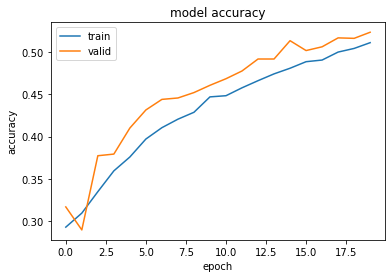

In [16]:
 #绘制训练时和验证时的精确度走势
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy') #图表标题
plt.ylabel('accuracy')      #纵坐标标题
plt.xlabel('epoch')         #横坐标标题
plt.legend(['train','valid'],loc='upper left') #图例放在左上角
plt.show() #展示图片

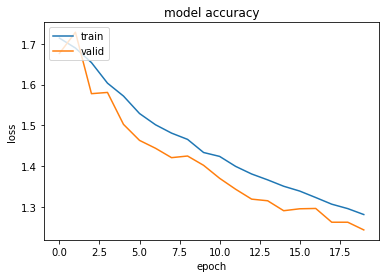

In [17]:
 #绘制训练时和验证时的损失值走势
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')#图表标题
plt.ylabel('loss')         #纵坐标标题
plt.xlabel('epoch')        #横坐标标题
plt.legend(['train','valid'],loc='upper left')#图例放在左上角
plt.show()#展示图片

(1000, 1000, 3)
[[0.26939198 0.02163552 0.21735696 0.1988384  0.12495904 0.12499505
  0.04282317]]


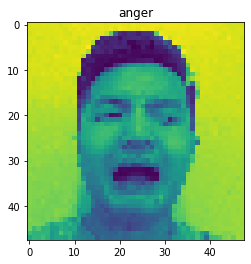

In [24]:
# from tensorflow.keras.models import load_model
# import matplotlib.pyplot as plt
# import cv2
# import numpy as np
# img = cv2.imread('test_imgs/victor_7.jpg')
# print(img.shape)
# img = np.array(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
# img = cv2.resize(img,(48,48))/255
# model = load_model('CNN.h5')
# pred = model.predict(img.reshape(1,48,48,1))
# emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'neutral'}
# pred = emotion_label_to_text[pred.argmax()]
# print(pred)

# plt.imshow(img.reshape())

from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('test_imgs/victor_7.jpg')
print(img.shape)
img = np.array(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))
img = cv2.resize(img,(48,48))/255
model = load_model('CNN.h5')
pred = model.predict(img.reshape(1,48,48,1))
emotion_label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4:'sadness', 5:'surprise', 6:'neutral'}
print(pred)
plt.imshow(img)
plt.title(emotion_label_to_text[pred.argmax()])
pred = emotion_label_to_text[pred.argmax()]
